In [5]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf

import sys

############################################################################################
#  Set the following path to where the DDM repository is                                   #
############################################################################################
sys.path.append("C:\\Users\\Ryan\\Documents\\GitHub\\Differential-Dynamic-Microscopy---Python\\")
#sys.path.append("C:\\Users\\rmcgorty\\Documents\\GitHub\\Differential-Dynamic-Microscopy---Python\\")

import tiff_file
import ddm_clean as ddm

## Image autocorrelation function defined below

In [6]:
def im_corr(image, filter=False, filtersize=80):
    '''
    Computes image autocorrelation. 
    Takes as input:
        image: 2D image
        filter: Boolean, if true will filter image with uniform filter
        filtersize: size for uniform filtering
        
    Returns:
        corr_im: the image autocorrelation (this will be same size as image)
        rav_corr: radially averaged image autocorrelation
    '''
    
    if filter:
        image = image*1.0 - uf(image,filtersize)
    image = 1.0*image-image.mean() #subtract mean
    image = image/image.std() #normalize by standard deviation
    corr_im = abs(fftshift(ifft2(fft2(image)*np.conj(fft2(image)))))/(image.shape[0]*image.shape[1])
    
    #radial average taken
    rav_corr = ddm.newRadav(corr_im)
    
    
    return corr_im, rav_corr

def filtimage(image, filtersize=80):
    image = image*1.0 - uf(image,filtersize)
    return image

In [7]:
###################################################################################
# Specify where the data is and file name for image (or image sequence)           #
###################################################################################

data_dir = "Y:\\Jon_Garamella\\data\\active_networks\\videos_date\\2020-06-17\\AMT\\nomyosin\\20200617_zstack_LK16yoyo_AMT_568actinRTubulin_40msEXPO_488OD4_1\\"
data_file = "20200617_zstack_LK16yoyo_AMT_568actinRTubulin_40msEXPO_488OD4_1_MMStack_Pos0.ome.tif"

In [8]:
#Load image

#The 'key' parameter specifies which frame to load
im_even = tiff_file.imread(data_dir+data_file,key=[60])

print("Shape of ims is %i,%i" % im_even.shape)

IOError: [Errno 2] No such file or directory: 'Y:\\Jon_Garamella\\data\\active_networks\\videos_date\\2020-06-17\\AMT\\nomyosin\\20200617_zstack_LK16yoyo_AMT_568actinRTubulin_40msEXPO_488OD4_1\\20200617_zstack_LK16yoyo_AMT_568actinRTubulin_40msEXPO_488OD4_1_MMStack_Pos0.ome.tif'

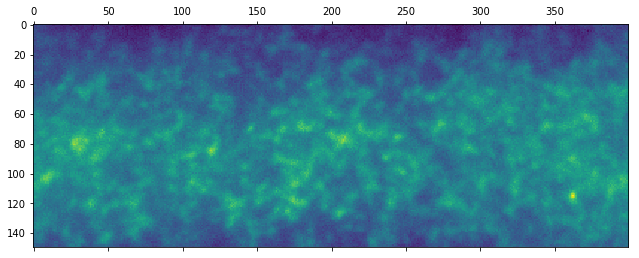

In [69]:
###############################################################
# Here, we crop image                                         #
###############################################################
xstart = 215
xstop = xstart+400
ystart = 38+25
ystop = ystart+200-50

im_even_2 = im_even[ystart:ystop,xstart:xstop]

plt.matshow(im_even_2)

In [20]:
###################################################################################
# Specify where another image to analyze is located                               #
###################################################################################

data_dir = "Y:\\Jon_Garamella\\data\\active_networks\\videos_date\\2020-06-17\\AMT\\yesmyosin\\20200617_LK16YOYO_AMT_568A_RT_samespot\\"
data_file = "20200617_LK16YOYO_AMT_568A_RT_samespot_MMStack_Pos0.ome.tif"

In [21]:
#Load image file (note that one frame is loaded using the 'key' parameter)
im_clump = tiff_file.imread(data_dir+data_file,key=[0])
print("Shape of ims is %i,%i" % im_clump.shape)

Shape of ims is 266,1024


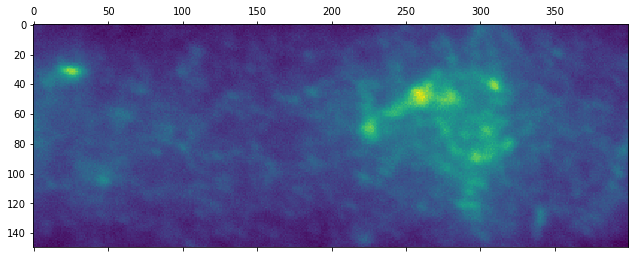

In [64]:
###############################################################
# Here, we crop image                                         #
###############################################################

xstart = 298
xstop = xstart+400
ystart = 2
ystop = ystart+200-50

im_clump_2 = im_clump[ystart:ystop,xstart:xstop]

plt.matshow(im_clump_2)

In [91]:
###############################################################
# Finding the image autocorrelations                          #
###############################################################

corr_im_even, corr_rad_even = im_corr(im_even_2,filter=True,filtersize=50)
corr_im_clump, corr_rad_clump = im_corr(im_clump_2,filter=True,filtersize=50)

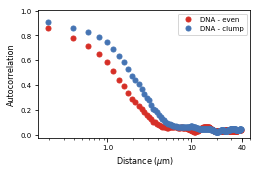

In [98]:
###############################################################
# Plots the radially averaged image autocorrelations          #
###############################################################

cmap = matplotlib.cm.get_cmap('RdYlBu')

fig, ax = plt.subplots(figsize=(3.8,3.8/1.618))
xvalues = np.arange(len(corr_rad_even))*0.196
ax.tick_params(axis='both', which='major', labelsize=7)
markerSize = 10
plt.semilogx(xvalues, gf1d(corr_rad_even,1),'.',ms=markerSize,c=cmap(0.1),label="DNA - even")
plt.plot(xvalues, gf1d(corr_rad_clump,1),'.',ms=markerSize,c=cmap(0.9),label="DNA - clump")
plt.xlabel("Distance ($\mu$m)",fontsize=8)
plt.ylabel("Autocorrelation",fontsize=8)
plt.legend(loc=0,fontsize=7)

#plt.xlim(0.14, 20)

ax.set_xticks([1.0, 10, 40])
ax.set_xticklabels(['1.0','10','40'], fontsize=7)

plt.savefig("autocorr_DNA.svg",dpi=600)

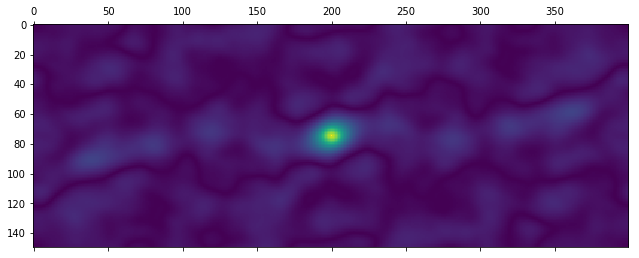

In [82]:
#Display the image 2D autocorrelation (not the radially averaged function)
plt.matshow(corr_im_clump)

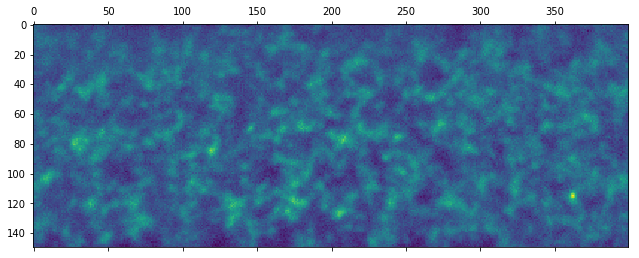

In [89]:
# Inspect the effect of the image filtering.
# Try out various 'filtersize' paramters so that any inhomogeneities in background
#      are removed as best as can be
plt.matshow(filtimage(im_even_2,filtersize=50))

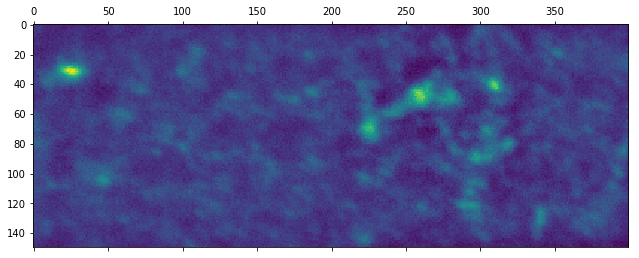

In [90]:
plt.matshow(filtimage(im_clump_2,filtersize=50))